# NetwortX Sample

In [1]:
import pandas as pd
import networkx as nx
import random
import matplotlib.pyplot as plt
%matplotlib inline

l = ['view1', 'view2', 'view3', 'view4', 'view5', 'view6']

df = pd.DataFrame({
    'user': ['user1', 'user2', 'user3', 'user4', 'user5'],
    'view': [random.choices(l, k=4), 
             random.choices(l, k=5), 
             random.choices(l, k=4), 
             random.choices(l, k=3), 
             random.choices(l, k=6)]
})
df

,user,view
0,user1,"[view6, view6, view5, view5]"
1,user2,"[view1, view4, view5, view4, view1]"
2,user3,"[view2, view5, view3, view3]"
3,user4,"[view6, view2, view1]"
4,user5,"[view5, view3, view4, view5, view3, view1]"


In [2]:
lists = df['view']

In [3]:
import collections
import itertools

list_count = collections.Counter(itertools.chain.from_iterable(lists)).most_common(50)
list_count

[('view5', 6),
 ('view1', 4),
 ('view3', 4),
 ('view6', 3),
 ('view4', 3),
 ('view2', 2)]

In [4]:
G = nx.Graph()
G.add_nodes_from([(view, {"count":count}) for view, count in list_count])

In [5]:
for l in lists:

    for node0, node1 in itertools.combinations(l, 2):
        if not G.has_node(node0) or not G.has_node(node1):
            continue
        if G.has_edge(node0, node1):
            G[node0][node1]["weight"] += 1
        else:
            G.add_edge(node0, node1, weight=1)

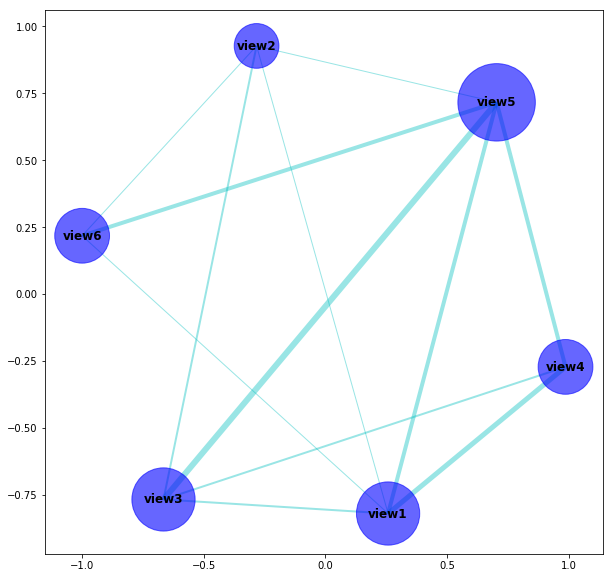

In [6]:
plt.figure(figsize=(10,10))
pos = nx.spring_layout(G, k=10)

node_size = [d['count']*1000 for (n,d) in G.nodes(data=True)]
nx.draw_networkx_nodes(G, pos, node_color='b', alpha=0.6, node_size=node_size)
nx.draw_networkx_labels(G, pos, fontsize=14, font_weight="bold")

edge_width = [d['weight'] for (u,v,d) in G.edges(data=True)]
nx.draw_networkx_edges(G, pos, alpha=0.4, edge_color='C', width=edge_width)

# plt.axis('off')
plt.savefig("graph.png")
plt.show()